In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import PyPDF2
import os
import textract
from konlpy.tag import *
from collections import Counter
import pdfplumber
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)

In [3]:
twitter = Okt()

path = "./data_edueval/"

morphs = []

for fp in os.listdir(path):
    with pdfplumber.open(os.path.join(path, fp)) as pdf:
        reader = PyPDF2.PdfFileReader(open(os.path.join(path, fp), "rb"))
        for i in range(reader.getNumPages()):
            page = pdf.pages[i]
            text = page.extract_text()
            morphs.append(twitter.pos(text))

In [4]:
noun_adj_adv_list=[]
 
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word):
            noun_adj_adv_list.append(word)
            
# print(noun_adj_adv_list)

In [8]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
# words

In [6]:
# print(morphs)

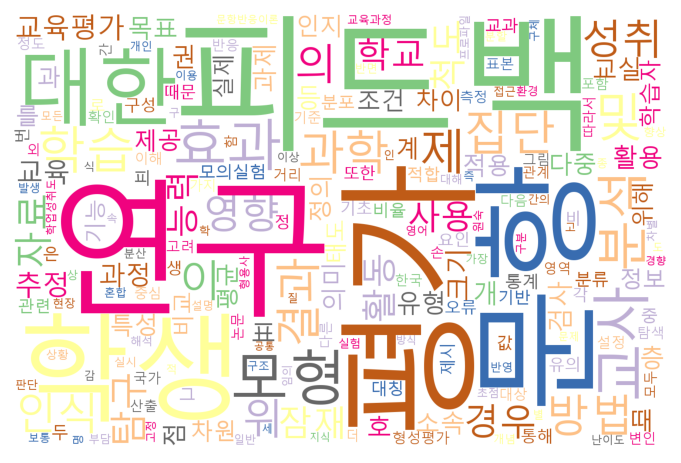

In [9]:
wordcloud = WordCloud(font_path = '../Fonts/malgun.ttf', background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()